In [1]:
import pickle
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree

In [2]:
directory = '/mnt/home/jbielecki1/NEMA/10000000/'
modelFileName = 'XGB/xgbEstimators1000Depth6'
feature_names = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'vol1', 'vol2', 'e1', 'e2', 'dt', 'rX1', 'rY1', 'rZ1', 'volD', 'lorL', 'deg3D', 'deg2D', 'rL', 'eSum']

In [3]:
model = pickle.load(open(directory + modelFileName, 'rb'))

In [4]:
X_test = pickle.load(open(directory + 'xTest', 'rb'))
y_test = pickle.load(open(directory + 'yTest', 'rb'))
class_test = y_test[["class"]].values
y_test = y_test[['newClass']].values

In [5]:
X_test.columns = ["f" + str(x) for x in range(20)]

In [6]:
y_pred_prob = model.predict_proba(X_test)

In [7]:
X_test.columns = feature_names

In [8]:
y_pred_prob = y_pred_prob
y_pred = y_pred_prob > 0.5

In [9]:
X_test_class_1 = X_test[class_test == 1]
X_test_class_2 = X_test[class_test == 2]
X_test_class_3 = X_test[class_test == 3]
X_test_class_4 = X_test[class_test == 4]
X_test_pred_1 = X_test[y_pred == 1]
X_test_pred_0 = X_test[y_pred == 0]

In [26]:
pPsOrginalPositive = X_test[y_test > 0]
pPsOrginalNegative = X_test[y_test == 0]
pPsPredictedPositive = X_test[y_pred[:,1]]
pPsPredictedNegative = X_test[y_pred[:,1] == 0]

In [27]:
FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

In [28]:
Class1 = len(X_test_class_1)
Class2 = len(X_test_class_2)
Class3 = len(X_test_class_3)
Class4 = len(X_test_class_4)
Class1P = len(pd.merge(pPsPredictedPositive,X_test_class_1, how='inner'))
Class2P = len(pd.merge(pPsPredictedPositive,X_test_class_2, how='inner'))
Class3P = len(pd.merge(pPsPredictedPositive,X_test_class_3, how='inner'))
Class4P = len(pd.merge(pPsPredictedPositive,X_test_class_4, how='inner'))
Class1N = len(pd.merge(pPsPredictedNegative,X_test_class_1, how='inner'))
Class2N = len(pd.merge(pPsPredictedNegative,X_test_class_2, how='inner'))
Class3N = len(pd.merge(pPsPredictedNegative,X_test_class_3, how='inner'))
Class4N = len(pd.merge(pPsPredictedNegative,X_test_class_4, how='inner'))

In [29]:
Class1ACC = (Class1P)/(Class1P + Class1N)*100.0
Class2ACC = (Class2N)/(Class2P + Class2N)*100.0
Class3ACC = (Class3N)/(Class3P + Class3N)*100.0
Class4ACC = (Class4N)/(Class4P + Class4N)*100.0

print("Class 1 accuracy: " + str(Class1ACC) + "%")
print("Class 2 accuracy: " + str(Class2ACC) + "%")
print("Class 3 accuracy: " + str(Class3ACC) + "%")
print("Class 4 accuracy: " + str(Class4ACC) + "%")

Class 1 accuracy: 95.34962167197187%
Class 2 accuracy: 59.51733630464705%
Class 3 accuracy: 11.071846173833961%
Class 4 accuracy: 98.43756431506526%


In [30]:
ACC = (TP + TN)/len(X_test) # accuracy
TPR = TP/(TP + FN) # recall
TNR = TN/(TN + FP) # selectivity
PPV = TP/(TP + FP) # precision
FPR = FP/(FP + TN) # background acceptance

print("Negative events (starting point of accuracy): " + str(len(y_test[y_test != 1])/len(y_test)*100.0) + "%")
print("Accuracy: " + str(ACC*100) + "%")
print("Recall: " + str(TPR*100) + "%")
print("Selectivity: " + str(TNR*100) + "%")
print("Precision: " + str(PPV*100) + "%")
print("Backgroung acceptance: " + str(FPR*100) + "%")

Negative events (starting point of accuracy): 70.79915%
Accuracy: 88.43215%
Recall: 95.34962167197187%
Selectivity: 85.57906415543124%
Precision: 73.16912290291384%
Backgroung acceptance: 14.420935844568755%


In [26]:
def plot_confusion_matrix(cm, classes, title, modelName, cmap=plt.cm.Blues):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(
        modelName + '\n' +
        "Accuracy: " + '%.2f' % ((cm[1, 1] + cm[0,0])*100/(cm[1, 1] + cm[0, 1] + cm[1, 0] + cm[0,0])) + '% ,'
        "Precision: " + '%.2f' % (cm[1, 1]*100/(cm[1, 1] + cm[0, 1])) + '% ,'
        "recall: " + '%.2f' % (cm[1, 1]*100/(cm[1, 1] + cm[1, 0])) + '%'
    )
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    # plt.savefig(getWorkingDir() + modelName + "/" + title + 'confMatrix.png')

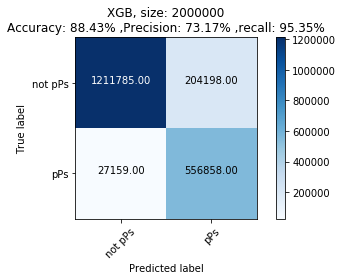

In [27]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(
    cm, 
    classes=['not pPs', 'pPs'],
    title='XGB-test',
    modelName = 'XGB, size: ' + str(y_pred.size)
)

In [79]:
def drawStats(attribute, subtitle, xLim1Row = None, xLim2Row = None):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 8)
    fig.suptitle(subtitle, fontsize = 20, y = 0.08)
    ax1 = plt.subplot(2,4,1)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.hist(X_test_pred_1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'Positive prediction')
    ax1.hist(X_test_class_1[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 1')
    ax1.tick_params(direction='out', labelsize = 15)
    if xLim1Row is not None:
        ax1.set_xlim(xLim1Row)
    ax1.legend()
    ax2 = plt.subplot(2,4,2)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax2.hist(X_test_pred_1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'Positive prediction')
    ax2.hist(X_test_class_2[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 2')
    if xLim1Row is not None:
        ax2.set_xlim(xLim1Row)
    ax2.legend()
    ax2.tick_params(direction='out', labelsize = 15)
    ax3 = plt.subplot(2,4,3)
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax3.hist(X_test_pred_1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'Positive prediction')
    ax3.hist(X_test_class_3[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 3')
    if xLim1Row is not None:
        ax3.set_xlim(xLim1Row)
    ax3.legend()
    ax3.tick_params(direction='out', labelsize = 15)
    ax4 = plt.subplot(2,4,4)
    ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax4.hist(X_test_pred_1[attribute], bins = 100, alpha = 0.5, color = 'green', label = 'Positive prediction')
    ax4.hist(X_test_class_4[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 4')
    if xLim1Row is not None:
        ax4.set_xlim(xLim1Row)
    ax4.legend()
    ax4.tick_params(direction='out', labelsize = 15)
    ax5 = plt.subplot(2,4,5)
    ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax5.hist(X_test_pred_0[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'Negative prediction')
    ax5.hist(X_test_class_1[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 1')
    ax5.tick_params(direction='out', labelsize = 15)
    if xLim2Row is not None:
        ax5.set_xlim(xLim2Row)
    ax5.legend()
    ax6 = plt.subplot(2,4,6)
    ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax6.hist(X_test_pred_0[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'Negative prediction')
    ax6.hist(X_test_class_2[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 2')
    if xLim2Row is not None:
        ax6.set_xlim(xLim2Row)
    ax6.legend()
    ax6.tick_params(direction='out', labelsize = 15)
    ax7 = plt.subplot(2,4,7)
    ax7.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax7.hist(X_test_pred_0[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'Negative prediction')
    ax7.hist(X_test_class_3[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 3')
    if xLim2Row is not None:
        ax7.set_xlim(xLim2Row)
    ax7.legend()
    ax7.tick_params(direction='out', labelsize = 15)
    ax8 = plt.subplot(2,4,8)
    ax8.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax8.hist(X_test_pred_0[attribute], bins = 100, alpha = 0.5, color = 'red', label = 'Negative prediction')
    ax8.hist(X_test_class_4[attribute], bins = 100, alpha = 0.5, color = 'blue', label = 'Class 4')
    if xLim2Row is not None:
        ax8.set_xlim(xLim2Row)
    ax8.legend()
    ax8.tick_params(direction='out', labelsize = 15)
    plt.show()

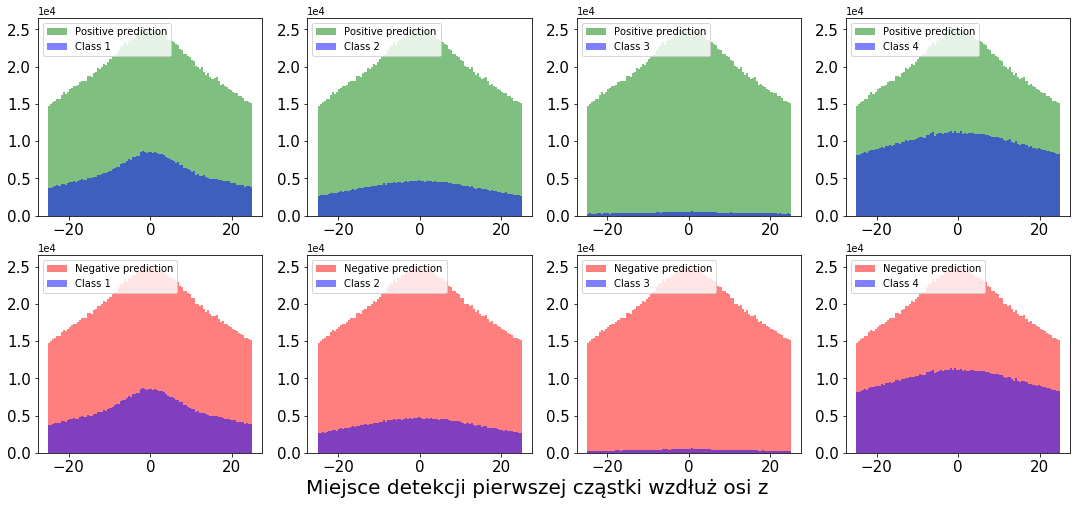

In [91]:
drawStats(
    attribute = 'z1',
    subtitle = 'Miejsce detekcji pierwszej cząstki wzdłuż osi z'
)

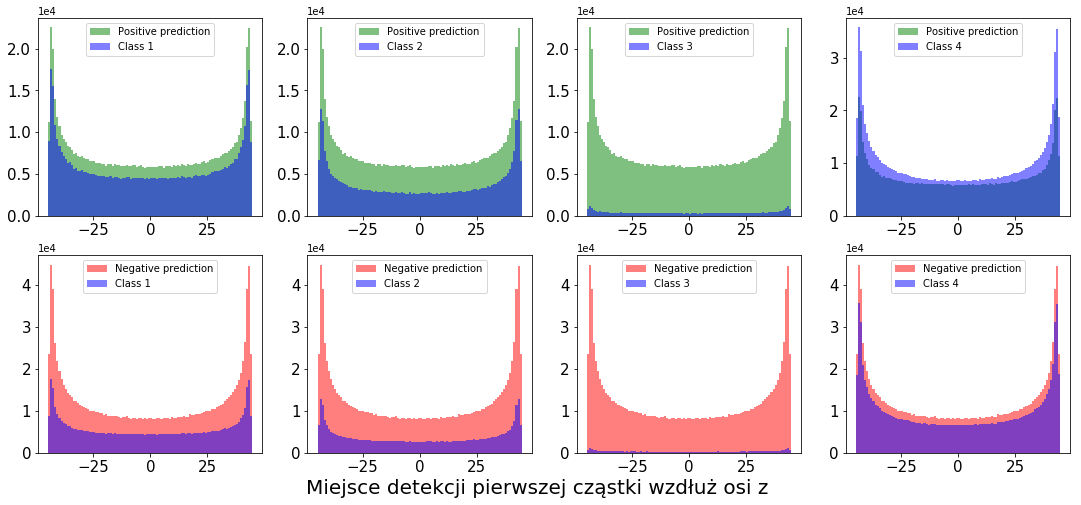

In [30]:
drawStats(
    attribute = 'x1',
    subtitle = 'Miejsce detekcji pierwszej cząstki wzdłuż osi z'
)

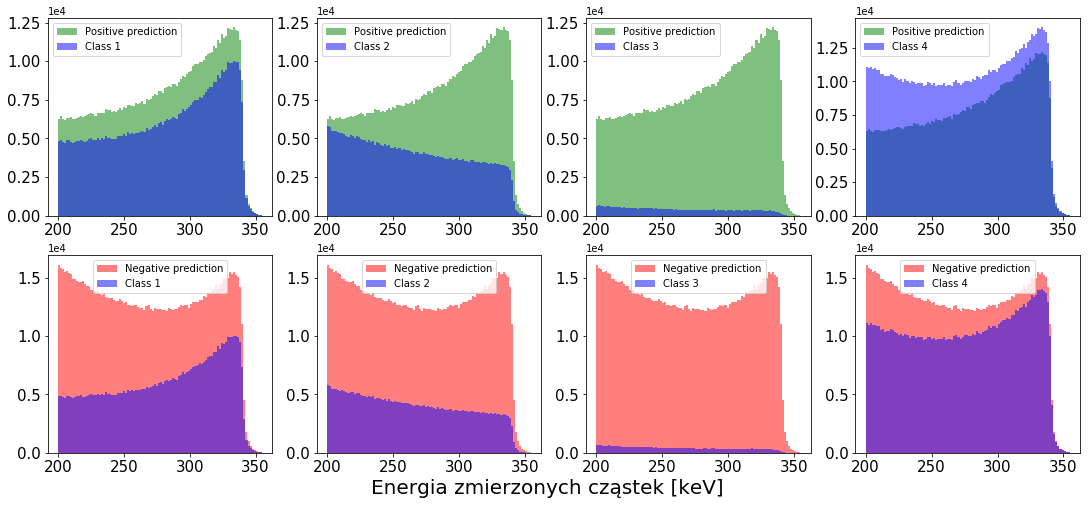

In [31]:
drawStats(
    attribute = 'e1',
    subtitle = 'Energia zmierzonych cząstek [keV]'
)

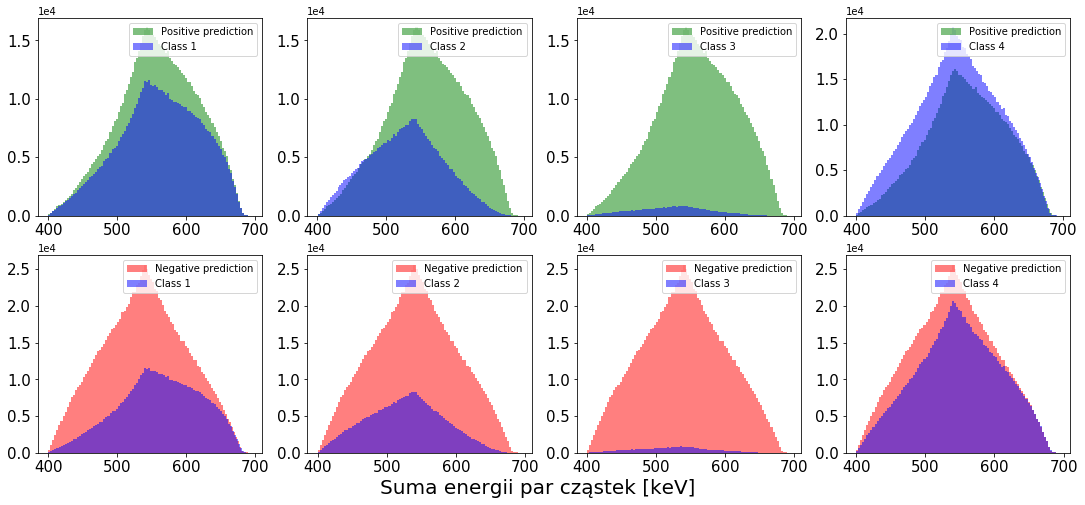

In [32]:
drawStats(
    attribute = 'eSum',
    subtitle = 'Suma energii par cząstek [keV]'
)

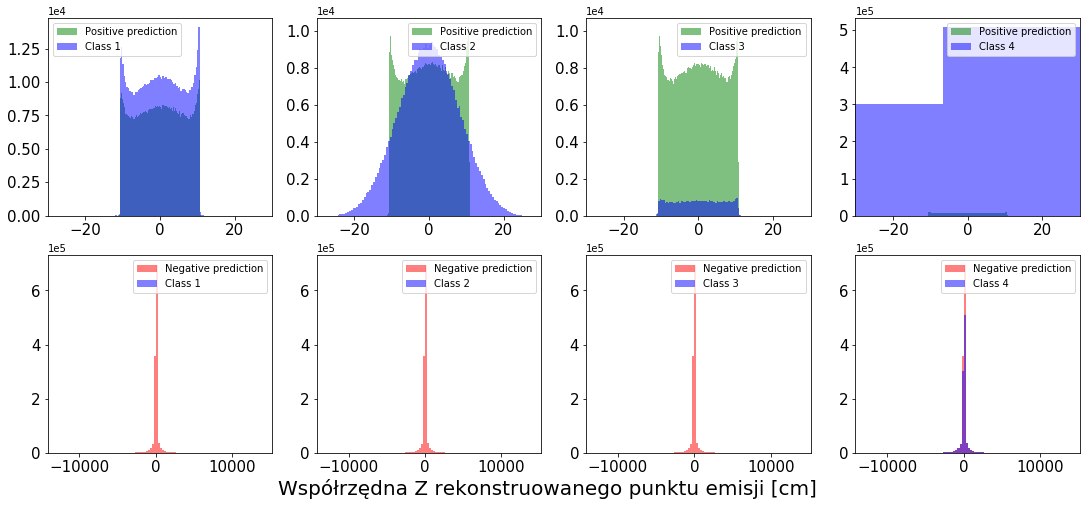

In [33]:
drawStats(
    attribute = 'rZ1',
    subtitle = 'Współrzędna Z rekonstruowanego punktu emisji [cm]',
    xLim1Row = (-30, 30)
)

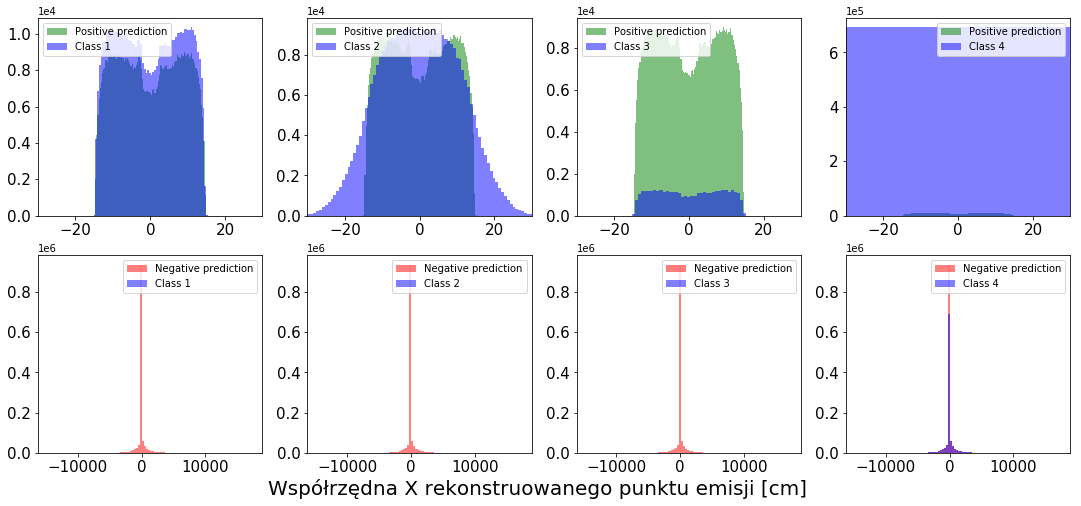

In [34]:
drawStats(
    attribute = 'rX1',
    subtitle = 'Współrzędna X rekonstruowanego punktu emisji [cm]',
    xLim1Row = (-30, 30)
)

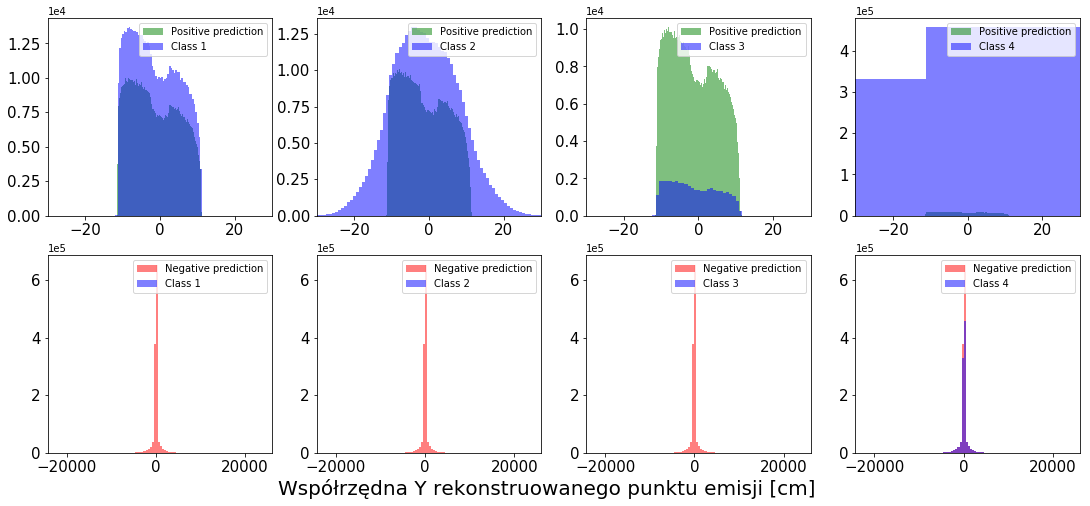

In [35]:
drawStats(
    attribute = 'rY1',
    subtitle = 'Współrzędna Y rekonstruowanego punktu emisji [cm]',
    xLim1Row = (-30, 30)
)

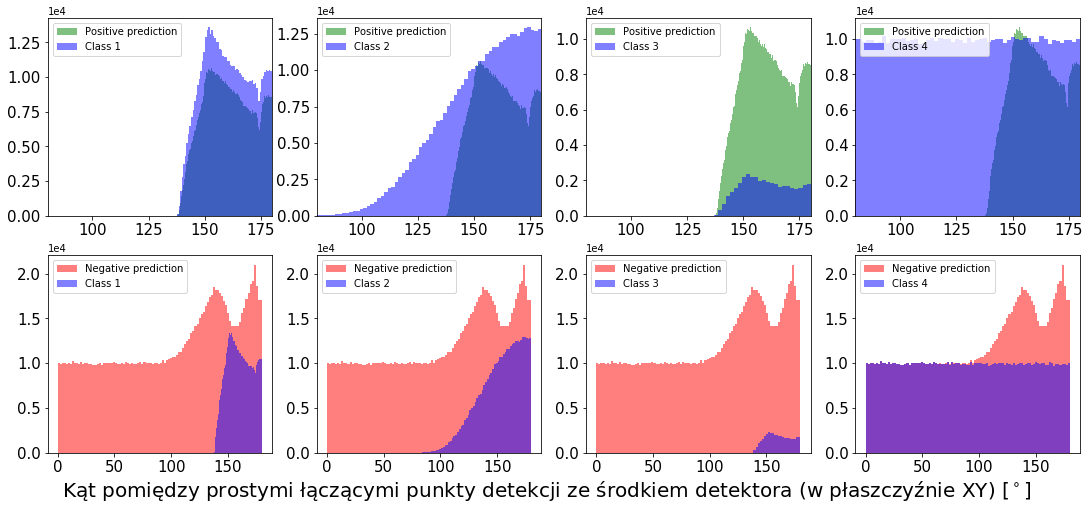

In [36]:
drawStats(
    attribute = 'deg2D',
    subtitle = 'Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XY) '+ r'$[^\circ]$',
    xLim1Row = (80, 180)
)

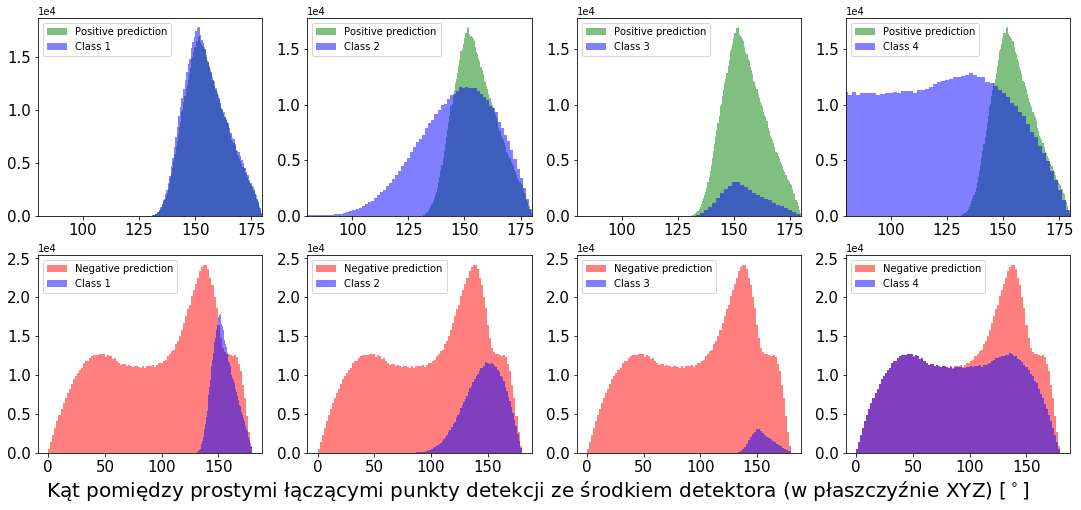

In [37]:
drawStats(
    attribute = 'deg3D',
    subtitle = 'Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XYZ) '+ r'$[^\circ]$',
    xLim1Row = (80, 180)
)

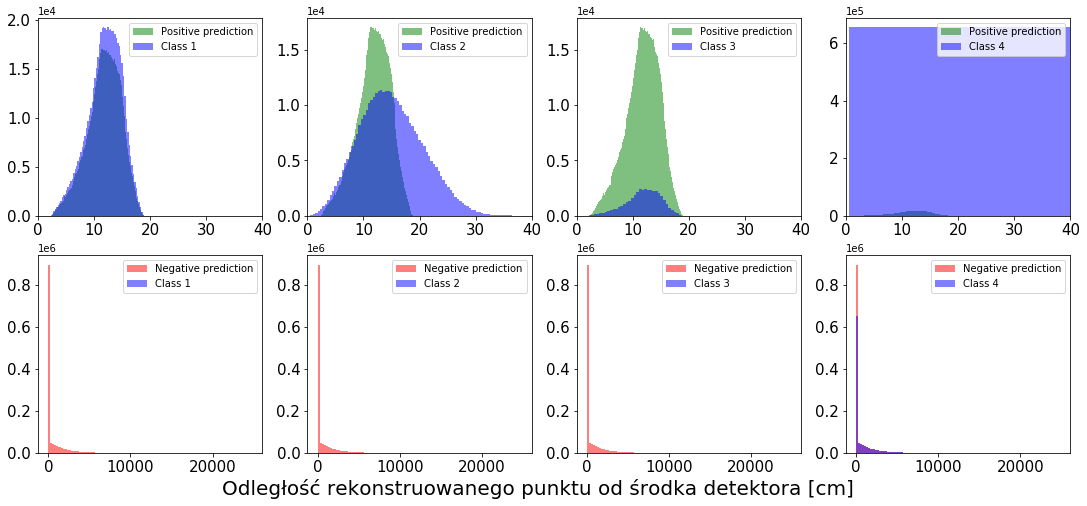

In [38]:
drawStats(
    attribute = 'rL',
    subtitle = 'Odległość rekonstruowanego punktu od środka detektora [cm]',
    xLim1Row = (0, 40)
)

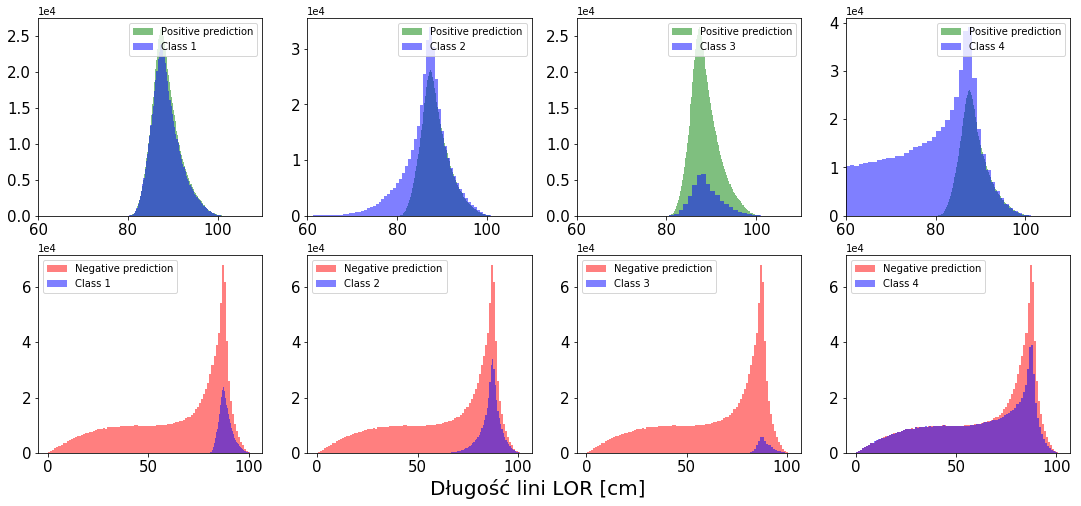

In [39]:
drawStats(
    attribute = 'lorL',
    subtitle = 'Długość lini LOR [cm]',
    xLim1Row = (60, 110)
)

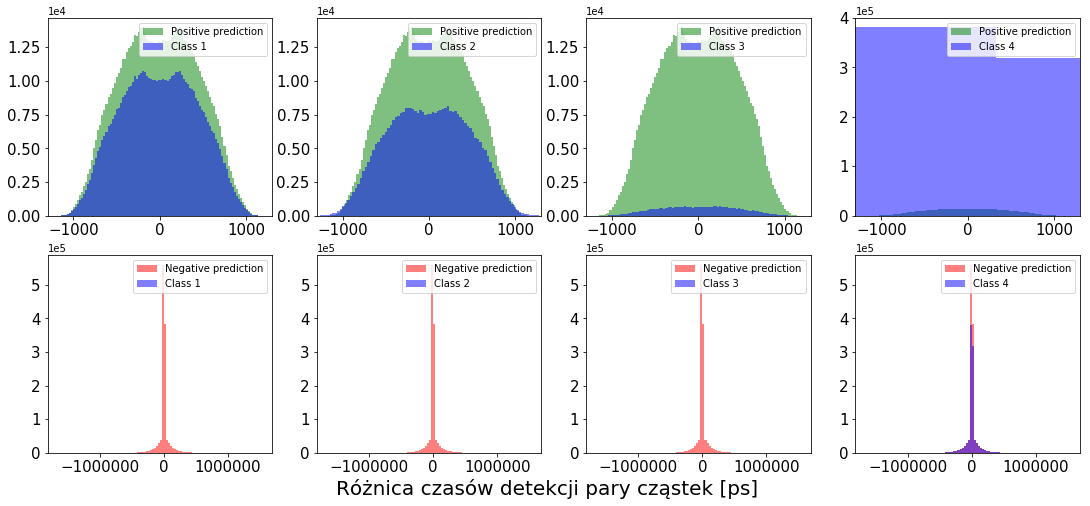

In [40]:
drawStats(
    attribute = 'dt',
    subtitle = 'Różnica czasów detekcji pary cząstek [ps]',
    xLim1Row = (-1300, 1300)
)

In [18]:
def plotFeatureImportances(features, importances, modelName):
    y_pos = np.arange(features.size)
    plt.clf()
    indexes = np.argsort(importances)
    plt.title("Feature importances - " + modelName)
    plt.barh(y_pos, np.sort(importances))
    plt.yticks(y_pos, features[indexes])
    plt.xlabel('F score')
    plt.ylabel("Feature")
    plt.show()

In [58]:
def getXGBFeatureImportances(importance_type):
    feature_importances = model.get_booster().get_score(importance_type = importance_type)
    feature_importances_values = list(model.get_booster().get_score(importance_type = importance_type).values())
    feature_importances_sum = sum(feature_importances_values)
    feature_importances_values_norm = [x/feature_importances_sum for x in feature_importances_values]
    correct_feature_importances = dict(zip(
        ["f" + str(x) for x in range(20)],
        feature_importances_values_norm
    ))

    for key, value in feature_importances.items():
        correct_feature_importances[key] = value/feature_importances_sum

    correct_names_feature_importances = dict(zip(
        feature_names,
        correct_feature_importances.values()
    ))
    return list(correct_names_feature_importances.values())

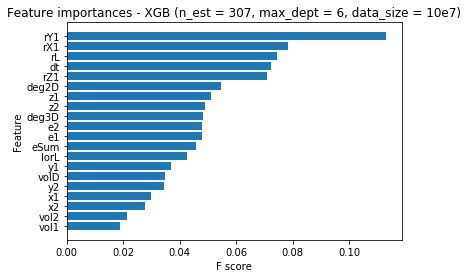

In [44]:
plotFeatureImportances(X_test.columns, model.feature_importances_, 'XGB (n_est = ' + str(307) + ', max_dept = ' + str(6) + ', data_size = 10e7)')

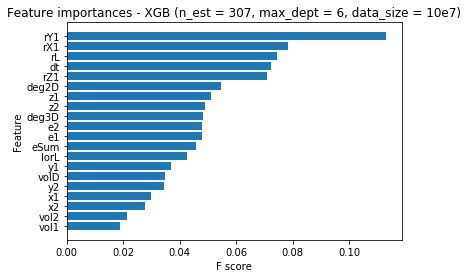

In [59]:
plotFeatureImportances(X_test.columns, getXGBFeatureImportances('weight'), 'XGB (n_est = ' + str(307) + ', max_dept = ' + str(6) + ', data_size = 10e7)')

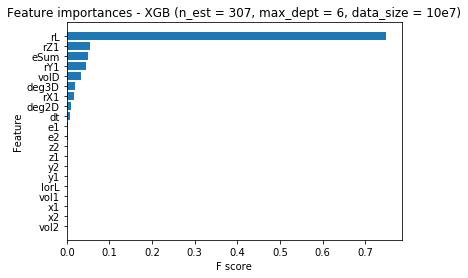

In [77]:
plotFeatureImportances(X_test.columns, getXGBFeatureImportances('gain'), 'XGB (n_est = ' + str(307) + ', max_dept = ' + str(6) + ', data_size = 10e7)')

In [35]:
def drawPrecision(X_test, y_test, y_pred_prob, modelName, title = 'ADA-test', resolution = 20):
    X_test = X_test
    plt.clf()
    points = pd.DataFrame(columns = ["recall", "precision", "threshold"])
    pPsOrginalPositive = X_test[y_test > 0]
    pPsOrginalNegative = X_test[y_test == 0]
    minProb = min(y_pred_prob)
    maxProb = max(y_pred_prob)
    
    for i in range(resolution + 1):
        threshold = minProb + (maxProb-minProb)*float(i)/float(resolution)
        y_pred = y_pred_prob > threshold
        pPsPredictedPositive = X_test[y_pred == 1]
        pPsPredictedNegative = X_test[y_pred == 0]

        FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
        TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
        TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
        FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

        if (TP+FN) != 0 and (TP+FP) != 0:
            points = points.append({"recall": TP/(TP+FN), "precision": TP/(TP+FP) , "threshold": threshold}, ignore_index = True)
    
    # Plot work point
    threshold = 0.5
    y_pred = y_pred_prob > threshold
    pPsPredictedPositive = X_test[y_pred == 1]
    pPsPredictedNegative = X_test[y_pred == 0]
    FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
    TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
    TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
    FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))
    plt.scatter(x = TP/(TP+FN), y = TP/(TP+FP), color = 'red', s = 35)
    
    # Plot the curve
    plt.plot(points["recall"], points["precision"], 'b-')
    plt.title("Precision in recall function - " + title)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.show()
    return points
    # plt.savefig(getWorkingDir() + modelName + "/precision" + title + ".png")

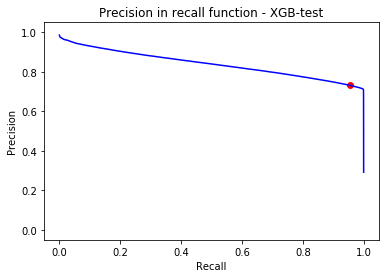

In [40]:
precRec = drawPrecision(X_test[['dt', 'e1', 'e2']], y_test, y_pred_prob[:,1], 'XGB', title = 'XGB-test', resolution = 100)

In [9]:
def drawROC(X_test, y_test, y_pred_prob, modelName, title = 'ADA-test', resolution = 20):
    X_test = X_test
    plt.clf()
    points = pd.DataFrame(columns = ["TPR", "FPR", "threshold"])
    pPsOrginalPositive = X_test[y_test > 0]
    pPsOrginalNegative = X_test[y_test == 0]
    minProb = min(y_pred_prob)
    maxProb = max(y_pred_prob)
    
    for i in range(resolution + 1):
        threshold = minProb + (maxProb-minProb)*float(i)/float(resolution)
        y_pred = y_pred_prob > threshold
        pPsPredictedPositive = X_test[y_pred == 1]
        pPsPredictedNegative = X_test[y_pred == 0]

        FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
        TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
        TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
        FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

        if (TP+FN) != 0 and (TP+FP) != 0:
            points = points.append({"TPR": TP/(TP+FN), "FPR": FP/(TN+FP) , "threshold": threshold}, ignore_index = True)
    
    # Plot work point
    threshold = 0.5
    y_pred = y_pred_prob > threshold
    pPsPredictedPositive = X_test[y_pred == 1]
    pPsPredictedNegative = X_test[y_pred == 0]
    FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
    TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
    TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
    FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))
    plt.scatter(x = FP/(TN+FP), y = TP/(TP+FN), color = 'red', s = 35)
    
    # Plot the curve
    plt.plot(points["FPR"], points["TPR"], 'b-')
    plt.title("ROC curve - " + title)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.show()
    return points
    # plt.savefig(getWorkingDir() + modelName + "/precision" + title + ".png")

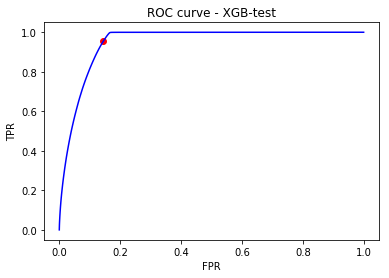

In [10]:
precRec = drawROC(X_test[['dt', 'e1', 'e2']], y_test, y_pred_prob[:,1], 'ADA', title = 'XGB-test', resolution = 100)

In [9]:
def getRatio(X_test, y_test, y_pred_prob, modelName, title = 'XGB-test', resolution = 20):
    X_test = X_test
    plt.clf()
    points = pd.DataFrame(columns = ["Ratio", "Positives", "threshold"])
    pPsOrginalPositive = X_test[y_test > 0]
    pPsOrginalNegative = X_test[y_test == 0]
    minProb = min(y_pred_prob)
    maxProb = max(y_pred_prob)
    
    for i in range(resolution + 1):
        threshold = minProb + (maxProb-minProb)*float(i)/float(resolution)
        y_pred = y_pred_prob > threshold
        pPsPredictedPositive = X_test[y_pred == 1]
        pPsPredictedNegative = X_test[y_pred == 0]

        FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
        TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
        TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
        FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

        if (TP+FN) != 0 and (TN+FP) != 0 and FP != 0:
            points = points.append({"Ratio": (TP/(TP+FN))/(FP/(TN+FP)), "Positives": (TP+FP)/(TP+FP+TN+FN), "threshold": threshold}, ignore_index = True)
    
    return points
    # plt.savefig(getWorkingDir() + modelName + "/precision" + title + ".png")

In [11]:
points = getRatio(X_test, y_test, y_pred_prob[:,1], modelName = 'XGB', title = 'XGB-test', resolution = 10)

<Figure size 432x288 with 0 Axes>

In [10]:
points100 = getRatio(X_test, y_test, y_pred_prob[:,1], modelName = 'XGB', title = 'XGB-test', resolution = 100)

<Figure size 432x288 with 0 Axes>

In [13]:
def plotRatio(points):
    # Plot the curve
    plt.plot(points["threshold"], points["Ratio"], 'b-')
    plt.title("FPR/TPR curve - " + "XGB-test")
    plt.xlabel("threshold")
    plt.ylabel("FPR/TPR")
    plt.xlim([-0.05, 1.05])
    plt.show()

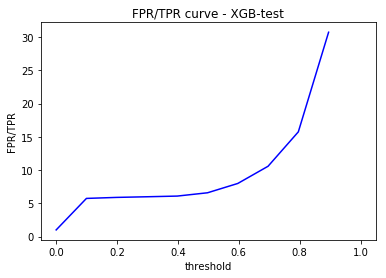

In [14]:
plotRatio(points)

In [18]:
def plotPositiveAndRatio(points):
    # Plot the curve
    plt.plot(points["threshold"], points["Positives"]*20, 'b-', label = "(FP+TP)/(FP+TP+FN+TN) x20")
    plt.plot(points["threshold"], points["Ratio"], 'g-', label = "FPR/TPR")
    plt.title("FPR/TPR curve - " + "XGB-test")
    plt.xlabel("threshold")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-1, 25])
    plt.legend()
    plt.show()

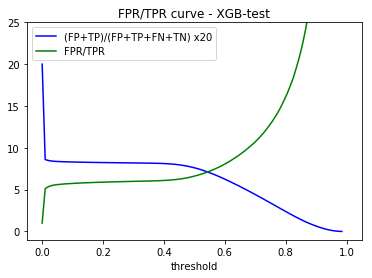

In [19]:
plotPositiveAndRatio(points100)

In [25]:
def histProbabilities(probabilities, title, bins = 20):
    plt.hist(probabilities, bins = bins)
    plt.title(title + " output probabilities")
    plt.xlabel("Probability")
    plt.ylabel("#")
    plt.show()

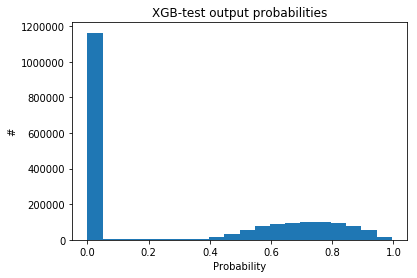

In [26]:
histProbabilities(y_pred_prob[:,1], "XGB-test", bins = 20)